In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import userdata
token = userdata.get('Cryptonite-Token')

In [3]:
!git config --global user.email "idantsri2007@gmail.com"
!git config --global user.name "SILETRO"

In [4]:
!git clone https://{token}@github.com/SILETRO/Cryptonite-RTP-Idant.git
%cd Cryptonite-RTP-Idant

Cloning into 'Cryptonite-RTP-Idant'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 38 (delta 10), reused 33 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 845.31 KiB | 20.62 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/Cryptonite-RTP-Idant


In [ ]:
!mkdir classification

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/fraud.ipynb' classification/

In [ ]:
!git add .

In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   classification/fraud.ipynb



In [ ]:
!git commit -m "Initial commit: Add notebook and files"
!git push -u origin main

[main 4e1fc85] Initial commit: Add notebook and files
 1 file changed, 1 insertion(+)
 create mode 100644 classification/fraud.ipynb
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 58.11 KiB | 3.06 MiB/s, done.
Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/SILETRO/Cryptonite-RTP-Idant.git
   677d25f..4e1fc85  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/onlinefraud.csv')

### Exploratory Anaylsis

In [ ]:
data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
31049,8,PAYMENT,2000.96,C688177699,0.00,0.00,M1212075234,0.00,0.0,0.0,0.0
32421,8,CASH_IN,128290.43,C1711455859,2281496.35,2409786.78,C1377194794,2994347.41,5272970.8,0.0,0.0
40340,9,PAYMENT,4798.87,C715289650,0.00,0.00,M245334821,0.00,0.0,0.0,0.0
5667,6,PAYMENT,280.58,C788075428,125235.00,124954.42,M1376533963,0.00,0.0,0.0,0.0
17160,8,PAYMENT,1252.69,C453226690,41193.00,39940.31,M1440925386,0.00,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB


In [ ]:
data.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
data.describe().round(3)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2439784.000,2.439784e+06,2.439783e+06,2.439783e+06,2.439783e+06,2.439783e+06,2439783.000,2439783.0
mean,103.286,1.590095e+05,8.498915e+05,8.713111e+05,9.955426e+05,1.107767e+06,0.001,0.0
std,69.168,2.659942e+05,2.922247e+06,2.958536e+06,2.303169e+06,2.390202e+06,0.030,0.0
min,1.000,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.0
25%,34.000,1.270218e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.0
50%,133.000,7.733723e+04,1.486207e+04,0.000000e+00,1.379825e+05,2.265836e+05,0.000,0.0
75%,163.000,2.142331e+05,1.172240e+05,1.582472e+05,9.469713e+05,1.140980e+06,0.000,0.0
max,203.000,1.000000e+07,3.893942e+07,3.894623e+07,4.228378e+07,4.265577e+07,1.000,0.0


In [ ]:
data['isFraud'].value_counts()  #very unbalanced dataset

,count
isFraud,
0,6354407
1,8213


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
X = data.drop('isFraud',axis=1)
y = data['isFraud']

In [ ]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0


### Pipeline

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [ ]:
num_attribs = X_train.select_dtypes(include=np.number).columns.tolist()
cat_attribs = ['type']

In [ ]:
num_pipeline = Pipeline([
                        ("scaler",StandardScaler())
])
cat_pipeline = Pipeline([
                        ("label",OneHotEncoder(sparse_output=False)),
                        ("scaler", StandardScaler())
])

In [ ]:
from sklearn.compose import ColumnTransformer
preprocess_pipeline = ColumnTransformer([
        ("num",num_pipeline,num_attribs),
        ("cat",cat_pipeline,cat_attribs)
])

In [ ]:
X_train_processed = preprocess_pipeline.fit_transform(X_train)
X_test_processed = preprocess_pipeline.transform(X_test)

In [ ]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay
def measure_error(y_true, y_pred):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred),
                      'roc': roc_auc_score(y_true,y_pred)})

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
def confusion_matrix_disp(y_test,y_pred):
  cm = confusion_matrix(y_test,y_pred,normalize='true')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

### Training Models

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_processed,y_train = smote.fit_resample(X_train_processed,y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_processed,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_tree = tree_clf.predict(X_test_processed)

In [ ]:
measure_error(y_test,y_pred_tree)

,0
accuracy,0.999384
precision,0.684527
recall,0.969562
f1,0.802486
roc,0.984492


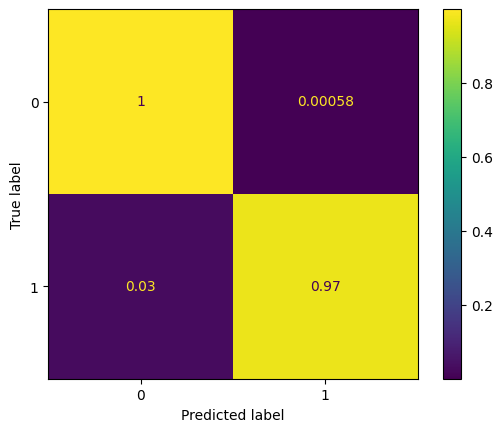

In [ ]:
confusion_matrix_disp(y_test,y_pred_tree)

In [ ]:
tree_clf.tree_.max_depth

36

In [ ]:
tree_clf.min_samples_split

2

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'max_depth': range(3,37,3),
    'min_samples_split': [2,5,7,9,10]
}
random_grid_tree = RandomizedSearchCV(
        estimator=tree_clf,
        param_distributions=param_grid,
        n_iter=5,
        cv=3,  # 3-fold cross-validation
        scoring='f1',
        n_jobs=-1,  # use all cores
        random_state=42
)
random_grid_tree.fit(X_train_processed,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 37, 3),
                                        'min_samples_split': [2, 5, 7, 9, 10]},
                   random_state=42, scoring='f1')

In [ ]:
random_grid_tree.best_params_ #these are the best parameters

{'min_samples_split': 2, 'max_depth': 30}

In [ ]:
y_pred_tr_best = random_grid_tree.predict(X_test_processed)
measure_error(y_test,y_pred_tr_best)

,0
accuracy,0.999389
precision,0.686494
recall,0.969562
f1,0.803836
roc,0.984495


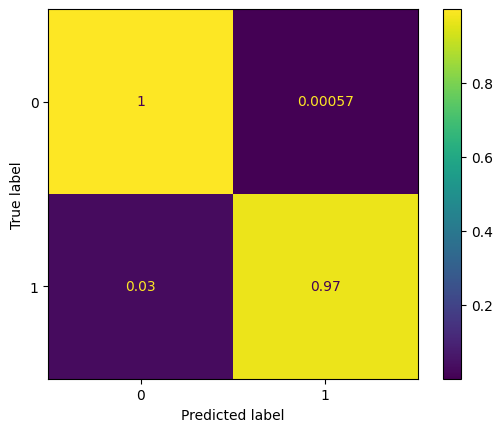

In [ ]:
confusion_matrix_disp(y_test,y_pred_tr_best)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=42)
rf_clf.fit(X_train_processed,y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf = rf_clf.predict(X_test_processed)
measure_error(y_test,y_pred_rf)

,0
accuracy,0.999212
precision,0.626582
recall,0.964286
f1,0.759591
roc,0.981771


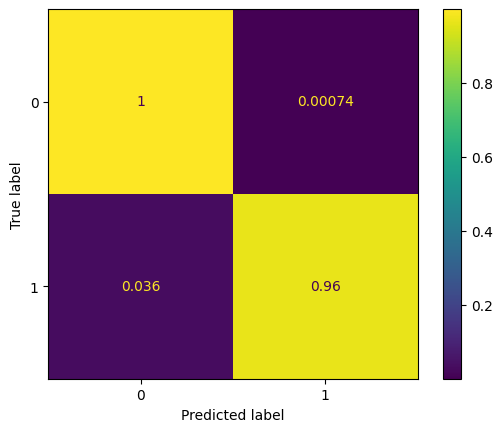

In [ ]:
confusion_matrix_disp(y_test,y_pred_rf)